In [1]:
import os
os.chdir('C:/Users/gusahil/Documents/Data Science Endeavours/Sarcasm Detection')
print (os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import nltk

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

C:\Users\gusahil\Documents\Data Science Endeavours\Sarcasm Detection


C:\Users\gusahil\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Reading the JSON File
raw_df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
raw_df.head(1000)

article_link  \
0    https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5                                                               
1    https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365                                                          
2    https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697                                                     
3    https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302                                                   
4    https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb                                           
5    https://www.huffingtonpost.com/entry/advancing-the-worlds-women_b_6810038.html                                                                    
6    https://www.huffingtonpost.com/entry/how-meat-is-grown-in-a-lab_us_561d1189e4b0c5a1ce607e86                                                       
7    https://www.huffingtonpost.com/entry/boxed-college-tuition-ben_n_7445644.html                                                                     
8    https://politics.theonion.com/top-snake-handler-leaves-sinking-huckabee-campaign-1819578231                                                       
9    https://www.huffingtonpost.com/entry/fridays-morning-email-inside-trumps-presser-for-the-ages_us_58a6e33ee4b07602ad53a315                         
10   https://www.huffingtonpost.com/entry/airline-passengers-tackle-man-who-rushes-cockpit-in-bomb-threat_us_59302e57e4b07572bdbf9460                  
11   https://www.huffingtonpost.com/entry/facebook-healthcare_n_5926140.html                                                                           
12   https://www.huffingtonpost.comhttp://www.theguardian.com/world/2016/may/31/north-korea-praises-trump-and-urges-us-voters-to-reject-dull-hillary   
13   https://www.huffingtonpost.com/entry/jeffrey-lord-worst-comments_us_598cd410e4b09071f6989d91                                                      
14   https://www.huffingtonpost.com/entry/barcelona-refugee-protest_us_58aa040ce4b037d17d290230                                                        
15   https://entertainment.theonion.com/nuclear-bomb-detonates-during-rehearsal-for-spider-man-1819572009                                              
16   https://www.theonion.com/cosby-lawyer-asks-why-accusers-didn-t-come-forward-to-b-1819577265                                                       
17   https://www.theonion.com/stock-analysts-confused-frightened-by-boar-market-1819567580                                                             
18   https://www.huffingtonpost.com/entry/bloomberg-philanthropies-what-works-cities-expands_us_566746f3e4b080eddf55ee73                               
19   https://www.huffingtonpost.com/entry/craig-hicks-indicted-chapel-hill_n_6692980.html                                                              
20   https://local.theonion.com/courtroom-sketch-artist-has-clear-manga-influences-1820298494                                                          
21   https://politics.theonion.com/trump-assures-nation-that-decision-for-syrian-airstrike-1819579813                                                  
22   https://www.huffingtonpost.com/entry/qatar-dutch-woman-raped_us_575eb891e4b00f97fba8cead                                                          
23   https://www.huffingtonpost.comhttp://pubx.co/dnWZew                                                                                               
24   https://www.huffingtonpost.com/entry/ted-cruz-republicans-lose-congress_us_5a9f60cee4b0e9381c135ba6                                               
25   https://www.huffingtonpost.com/entry/why-writers-must-plan-to-_b_8672192.html                                                                     
26   https://www.huffingtonpost.

In [3]:
# Extracting the Hostname from URL
raw_df['website_name'] = raw_df['article_link'].str.extract('(https://.*?[.]comhttp/'
                                                            '|https://.*?[.]com)', expand=True)
raw_df['website_name'] = raw_df['website_name'].str.replace('https://','').str.replace('/','').str.replace('comhttp','com')
#raw_df = raw_df.drop(['article_link'], axis=1)
raw_df.head(3)

article_link  \
0  https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5             
1  https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365        
2  https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697   

                                                                               headline  \
0  former versace store clerk sues over secret 'black code' for minority shoppers         
1  the 'roseanne' revival catches up to our thorny political mood, for better and worse   
2  mom starting to fear son's web series closest thing she will have to grandchild        

   is_sarcastic            website_name  
0  0             www.huffingtonpost.com  
1  0             www.huffingtonpost.com  
2  1             local.theonion.com

In [4]:
list(np.unique(np.array(raw_df['website_name'])))

['entertainment.theonion.com',
 'local.theonion.com',
 'politics.theonion.com',
 'sports.theonion.com',
 'www.huffingtonpost.com',
 'www.theonion.com']

In [5]:
pd.pivot_table(raw_df, values=['is_sarcastic'], index=['website_name'], #columns=['is_sarcastic'], 
               aggfunc=('sum','count'), fill_value=0)

is_sarcastic      
                                  count   sum
website_name                                 
entertainment.theonion.com  1194         1194
local.theonion.com          2852         2852
politics.theonion.com       1767         1767
sports.theonion.com         100          100 
www.huffingtonpost.com      14985        0   
www.theonion.com            5811         5811

In [6]:
#raw_df[raw_df.website_name == 'www.huffingtonpost.com'][['headline_feature','is_sarcastic']].head(5)

In [7]:
raw_df['website_name'].isnull().any()

False

In [8]:
raw_df = raw_df.rename(columns = {"headline": "headline_feature"}) 

In [9]:
# Summary Stats
raw_df.describe(include='all').transpose()

count unique  \
article_link      26709  26708   
headline_feature  26709  26602   
is_sarcastic      26709  NaN     
website_name      26709  6       

                                                                                                                        top  \
article_link      https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2016/05/hillary-clinton-candidacy.html   
headline_feature  sunday roundup                                                                                              
is_sarcastic      NaN                                                                                                         
website_name      www.huffingtonpost.com                                                                                      

                   freq      mean       std  min  25%  50%  75%  max  
article_link      2      NaN       NaN       NaN  NaN  NaN  NaN  NaN  
headline_feature  10     NaN       NaN       NaN  NaN  NaN  NaN  NaN  
is_sarcastic      NaN    0.438953  0.496269  0    0    0    1    1    
website_name      14985  NaN       NaN       NaN  NaN  NaN  NaN  NaN

In [10]:
# Quick Profile of the Dataset
pandas_profiling.ProfileReport(raw_df)

In [11]:
# Just making sure, there are no Null values
raw_df[raw_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [article_link, headline_feature, is_sarcastic, website_name]
Index: []

In [12]:
# Split into Words
from nltk.tokenize import word_tokenize
raw_df['tokens'] = raw_df['headline_feature'].apply(nltk.word_tokenize)

In [13]:
# Convert to lower case
lower_case_tokens = lambda x : [w.lower() for w in x]
raw_df['tokens'] = raw_df['tokens'].apply(lower_case_tokens)

In [14]:
# Filter Out Punctuation
import string
punctuation_dict = str.maketrans(dict.fromkeys(string.punctuation))
# This creates a dictionary mapping of every character from string.punctuation to None

punctuation_remover = lambda x : [w.translate(punctuation_dict) for w in x]
raw_df['tokens'] = raw_df['tokens'].apply(punctuation_remover)

In [15]:
# Remove remaining tokens that are not alphabetic
nonalphabet_remover = lambda x : [w for w in x if w.isalpha()]
raw_df['tokens'] = raw_df['tokens'].apply(nonalphabet_remover)

In [16]:
# Filter out Stop Words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopwords_remover = lambda x : [w for w in x if not w in stop_words]
raw_df['tokens'] = raw_df['tokens'].apply(stopwords_remover)

In [17]:
# Stem / Lemmatize the Words
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
word_lematizer = lambda x : [lmtzr.lemmatize(w) for w in x]
raw_df['tokens'] = raw_df['tokens'].apply(word_lematizer)

In [18]:
# Creating Bigrams
#raw_df['bigrams'] = raw_df['tokens'].apply(nltk.bigrams).apply(list)
#untupple = lambda x : [y[0] + '_' + y[1] for y in x]
#raw_df['bigrams'] = raw_df['tokens'].apply(untupple)

In [19]:
# Extract Vocabulary
import itertools
flattened_list  = list(itertools.chain(*raw_df['tokens']))
flattened_set = list(set(flattened_list))

In [20]:
len(flattened_set)
#print(flattened_set[1:100])

23599

In [21]:
sentence_creator = lambda x : [' '.join(x)][0]
raw_df['sentence_feature'] = raw_df['tokens'].apply(sentence_creator)

In [22]:
raw_df.head(100)

article_link  \
0   https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5                                                                     
1   https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365                                                                
2   https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697                                                           
3   https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302                                                         
4   https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb                                                 
5   https://www.huffingtonpost.com/entry/advancing-the-worlds-women_b_6810038.html                                                                          
6   https://www.huffingtonpost.com/entry/how-meat-is-grown-in-a-lab_us_561d1189e4b0c5a1ce607e86                                                             
7   https://www.huffingtonpost.com/entry/boxed-college-tuition-ben_n_7445644.html                                                                           
8   https://politics.theonion.com/top-snake-handler-leaves-sinking-huckabee-campaign-1819578231                                                             
9   https://www.huffingtonpost.com/entry/fridays-morning-email-inside-trumps-presser-for-the-ages_us_58a6e33ee4b07602ad53a315                               
10  https://www.huffingtonpost.com/entry/airline-passengers-tackle-man-who-rushes-cockpit-in-bomb-threat_us_59302e57e4b07572bdbf9460                        
11  https://www.huffingtonpost.com/entry/facebook-healthcare_n_5926140.html                                                                                 
12  https://www.huffingtonpost.comhttp://www.theguardian.com/world/2016/may/31/north-korea-praises-trump-and-urges-us-voters-to-reject-dull-hillary         
13  https://www.huffingtonpost.com/entry/jeffrey-lord-worst-comments_us_598cd410e4b09071f6989d91                                                            
14  https://www.huffingtonpost.com/entry/barcelona-refugee-protest_us_58aa040ce4b037d17d290230                                                              
15  https://entertainment.theonion.com/nuclear-bomb-detonates-during-rehearsal-for-spider-man-1819572009                                                    
16  https://www.theonion.com/cosby-lawyer-asks-why-accusers-didn-t-come-forward-to-b-1819577265                                                             
17  https://www.theonion.com/stock-analysts-confused-frightened-by-boar-market-1819567580                                                                   
18  https://www.huffingtonpost.com/entry/bloomberg-philanthropies-what-works-cities-expands_us_566746f3e4b080eddf55ee73                                     
19  https://www.huffingtonpost.com/entry/craig-hicks-indicted-chapel-hill_n_6692980.html                                                                    
20  https://local.theonion.com/courtroom-sketch-artist-has-clear-manga-influences-1820298494                                                                
21  https://politics.theonion.com/trump-assures-nation-that-decision-for-syrian-airstrike-1819579813                                                        
22  https://www.huffingtonpost.com/entry/qatar-dutch-woman-raped_us_575eb891e4b00f97fba8cead                                                                
23  https://www.huffingtonpost.comhttp://pubx.co/dnWZew                                                                                                     
24  https://www.huffingtonpost.com/entry/ted-cruz-republicans-lose-congress_us_5a9f60cee4b0e9381c135ba6                                                     
25  https://www.huffingtonpost.com/entry/why-writers-must-p

In [23]:
import sklearn.feature_extraction.text as sfText

vect = sfText.CountVectorizer()#(ngram_range = (1, 2))
vect.fit(raw_df['sentence_feature'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
X = vect.transform(raw_df['sentence_feature'])

In [25]:
tokenDataFrame = pd.DataFrame(X.A, columns = vect.get_feature_names())
tokenDataFrame.head(1)
#tokenDataFrame = pd.DataFrame(tokenMatrix)

aaa  aaron  aarp  aatish  ab  abandon  abandoned  abandoning  abaya  abbas  \
0  0    0      0     0       0   0        0          0           0      0       

   abbey  abbi  abby  abc  abdeslam  abdomen  abdominable  abducted  \
0  0      0     0     0    0         0        0            0          

   abduction  abdul  abduljabbar  abdulrahman  abe  abedin  abhorrent  \
0  0          0      0            0            0    0       0           

   ability  abject  able  aboard  abolish  abolishing  abominable  \
0  0        0       0     0       0        0           0            

   abomination  aborted  abortion  abouncin  aboveground  abraham  abrams  \
0  0            0        0         0         0            0        0        

   abramson  abridged  abroad  abruptly  absence  absent  absentminded  \
0  0         0         0       0         0        0       0              

   absolute  absolutely  absolving  absomoochly  absorbed  abstention  absurd  \
0  0         0           0          0            0         0           0        

   absurdity  abu  abukar  abuse  abused  abuser  abusing  abusive  abuzz  \
0  0          0    0       0      0       0       0        0        0       

   abysmally  abyss  aca  acaamazing  academic  academy  acadia  acahere  \
0  0          0      0    0           0         0        0       0         

   acamazing  accelerate  accelerator  accent  accept  acceptable  acceptance  \
0  0          0           0            0       0       0           0            

   accepted  accepting  accepts  access  accessibility  accessible  accessory  \
0  0         0          0        0       0              0           0           

   accident  accidental  accidentally  acclaimed  acclimate  accommodate  \
0  0         0           0             0          0          0             

   accommodated  accommodation  accompanied  accompanying  accomplish  \
0  0             0              0            0             0            

   accomplished  accomplishment  accord  according  account  accountability  \
0  0             0               0       0          0        0                

   accountable  accountant  accounting  accuracy  accurate  accurately  \
0  0            0           0           0         0         0            

   accusation  accuse  accused  accuser  accuses  accusing  accusingly  ace  \
0  0           0       0        0        0        0         0           0     

   acetaminophen  ache  achievable  achieve  achievement  achieves  achieving  \
0  0              0     0           0        0            0         0           

   achievment  achilles  aching  acid  acknowledge  acknowledged  \
0  0           0         0       0     0            0              

   acknowledgement  acknowledges  acknowledging  aclu  acne  acnefree  acorn  \
0  0                0             0              0     0     0         0       

   acosta  acoustic  acousticguitarwielding  acquaintance  acquire  acquired  \
0  0       0         0                       0             0        0          

   acquires  acquiring  acquisition  acquittal  acquitted  acre  acronym  \
0  0         0          0            0          0          0     0         

   across  act  acted  acting  action  activate  activated  active  actively  \
0  0       0    0      0       0       0         0          0       0          

   activism  activist  activity  actor  actorcomedian  actress  actual  \
0  0         0         0         0      0              0        0        

   actually  acupuncture  acute  ad  adam  adamant  adapt  adaptation  \
0  0         0            0      0   0     0        0      0            

   adapting  add  addcandytoamovie  addclimatechangetotv  added  adderall  \
0  0         0    0                 0                     0      0          

   addict  addicted  addiction  addictive  adding  addition  additional  \
0  0       0         0          0          0       0         0            

   ad

In [26]:
vect.fit(raw_df['sentence_feature'].head(2))
X1 = vect.transform(raw_df.head(2)['sentence_feature'])
pd.DataFrame(X1.A, columns = vect.get_feature_names())

better  black  catch  clerk  code  former  minority  mood  political  \
0  0       1      0      1      1     1       1         0     0           
1  1       0      1      0      0     0       0         1     1           

   revival  roseanne  secret  shopper  store  sue  thorny  versace  worse  
0  0        0         1       1        1      1    0       1        0      
1  1        1         0       0        0      0    1       0        1

In [27]:
raw_df['sentence_feature'].head(2)

0    former versace store clerk sue secret black code minority shopper
1    roseanne revival catch thorny political mood better worse        
Name: sentence_feature, dtype: object

In [28]:
token_sums = tokenDataFrame.sum(axis=0)
print(token_sums[1:10])

aaron         9 
aarp          5 
aatish        1 
ab            6 
abandon       7 
abandoned     16
abandoning    4 
abaya         1 
abbas         2 
dtype: int64


In [29]:
print(token_sums[token_sums >= 5][1:10])

aarp         5 
ab           6 
abandon      7 
abandoned    16
abc          13
ability      14
able         21
abortion     57
abrams       7 
dtype: int64


In [30]:
tokens_redundant = token_sums[token_sums < 10].index
print(tokens_redundant)

Index(['aaa', 'aaron', 'aarp', 'aatish', 'ab', 'abandon', 'abandoning',
       'abaya', 'abbas', 'abbey',
       ...
       'zookeeper', 'zoolander', 'zoologist', 'zoomed', 'zoroastrianism',
       'zsa', 'zucker', 'zz', 'éclairs', 'ünited'],
      dtype='object', length=20144)


In [31]:
len(tokens_redundant)

20144

In [32]:
tokenDataFrame2 = tokenDataFrame.drop(tokens_redundant, axis = 1)

In [33]:
#from nltk.corpus import brown
import gensim
w2v_size = 100
model = gensim.models.Word2Vec(raw_df['tokens'], size = w2v_size)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

C:\Users\gusahil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """


In [34]:
# Word2Vec of Words
fetch_w2v = lambda x : [w2v[w] for w in x if w in w2v]
mean_w2v = lambda x : np.sum(x, axis=0)/len(x)
raw_df['fetch_w2v'] = raw_df['tokens'].apply(fetch_w2v)
raw_df['mean_w2v'] = raw_df['fetch_w2v'].apply(mean_w2v)

In [35]:
raw_df = raw_df.drop(['fetch_w2v'], axis=1)

In [36]:
w2v_col_names = ['c' + str(i) for i in range(0,w2v_size)]

In [37]:
w2v_DF = pd.DataFrame(index=range(0,1), columns=range(0,w2v_size))
w2v_DF = w2v_DF.iloc[1:]

# DF Append
for i in range(0,26709):
    if np.isnan(raw_df['mean_w2v'][i]).any() == False:
        w2v_DF = w2v_DF.append(pd.DataFrame(raw_df['mean_w2v'][i]).T)
    else:
        w2v_DF = w2v_DF.append(pd.DataFrame(np.zeros(w2v_size)).T)
        
w2v_DF.head(5)

0         1         2         3         4         5         6  \
0 -0.139985  0.003285 -0.543873  0.059772  0.292867  0.356666 -0.125814   
0 -0.121435  0.003876 -0.467312  0.051133  0.252841  0.310811 -0.108626   
0 -0.154318  0.004733 -0.592766  0.064784  0.321820  0.392463 -0.134153   
0 -0.165044  0.006634 -0.643368  0.069937  0.347600  0.424950 -0.144014   
0 -0.134951  0.000675 -0.529661  0.056480  0.284854  0.348880 -0.121394   

          7         8         9        10        11        12        13  \
0  0.319368 -0.278367 -0.282394 -0.087757  0.054021  0.269981 -0.221005   
0  0.274376 -0.240441 -0.242197 -0.075161  0.045387  0.234291 -0.189200   
0  0.346636 -0.302167 -0.305615 -0.092104  0.056747  0.295147 -0.233196   
0  0.375517 -0.328876 -0.331398 -0.098606  0.059910  0.319178 -0.253957   
0  0.309700 -0.270040 -0.270487 -0.085181  0.051686  0.262523 -0.212088   

         14        15        16        17        18        19        20  \
0 -0.242518 -0.049016 -0.082940  0.088703  0.028239  0.095270  0.289036   
0 -0.207283 -0.043683 -0.070952  0.079021  0.021207  0.082141  0.249519   
0 -0.258964 -0.051176 -0.091599  0.096980  0.029643  0.100039  0.311627   
0 -0.285617 -0.056102 -0.096999  0.106780  0.031893  0.110716  0.342080   
0 -0.236507 -0.047557 -0.080981  0.088952  0.025212  0.091815  0.279506   

         21        22        23        24        25        26        27  \
0 -0.129619  0.063590  0.201192  0.090313 -0.023810  0.052403  0.274729   
0 -0.114157  0.057465  0.173983  0.074566 -0.021994  0.045757  0.234911   
0 -0.145393  0.072874  0.219355  0.095351 -0.025569  0.050350  0.299033   
0 -0.153918  0.078742  0.239029  0.103526 -0.027059  0.058617  0.325586   
0 -0.130866  0.064351  0.195041  0.086430 -0.023220  0.048980  0.263350   

         28        29        30        31        32        33        34  \
0 -0.112848  0.096551 -0.024593 -0.224018  0.172920  0.032891 -0.008119   
0 -0.093326  0.085045 -0.022319 -0.195598  0.149366  0.029540 -0.009684   
0 -0.122878  0.110123 -0.028649 -0.247677  0.188533  0.036797 -0.011254   
0 -0.131413  0.119462 -0.029983 -0.265876  0.205786  0.041066 -0.013621   
0 -0.109151  0.096644 -0.023287 -0.220106  0.166836  0.031800 -0.009995   

         35        36        37        38        39        40        41  \
0  0.041698 -0.276660 -0.215059 -0.073384  0.181855  0.035777 -0.240782   
0  0.036321 -0.238999 -0.183635 -0.061575  0.159503  0.033119 -0.208032   
0  0.044119 -0.302426 -0.234054 -0.076530  0.201916  0.044715 -0.261763   
0  0.046288 -0.327340 -0.250638 -0.085180  0.216516  0.048489 -0.283337   
0  0.040606 -0.268400 -0.208105 -0.070630  0.179955  0.038062 -0.231642   

         42        43        44        45        46        47        48  \
0  0.185544  0.019772  0.137815  0.169118  0.120480 -0.027447 -0.097877   
0  0.155312  0.019439  0.120285  0.144291  0.107109 -0.024703 -0.081550   
0  0.202197  0.020401  0.148585  0.188736  0.126487 -0.032699 -0.105781   
0  0.214503  0.025600  0.160193  0.200044  0.140561 -0.035044 -0.113936   
0  0.179167  0.017183  0.129636  0.167364  0.116548 -0.027641 -0.093028   

         49        50        51        52        53        54        55  \
0 -0.041875  0.183934 -0.234216  0.249597  0.067072  0.369512 -0.162229   
0 -0.035156  0.159222 -0.200077  0.214869  0.058943  0.320892 -0.141744   
0 -0.048871  0.198724 -0.256083  0.270298  0.072518  0.398971 -0.182651   
0 -0.050595  0.219527 -0.277852  0.293187  0.079031  0.437618 -0.195730   
0 -0.041701  0.177853 -0.226352  0.240588  0.064669  0.359032 -0.161924   

         56        57        58        59        60        61        62  \
0 -0.161327  0.095138 -0.022989  0.201381  0.393674  0.102814  0.242178   
0 -0.138718  0.082540 -0.020621  0.173111  0.340265  0.091688  0.204686   
0 -0.172016  0.102923 -0.019995  0.220397  0.425029  0.109920  0.258563   
0 -0.191030  0.109010 -0.025633  0.237689  0.461000  0.119271  0.280727   
0 -0.154835  0.086357 -0.02

In [38]:
w2v_DF.shape

(26709, 100)

In [39]:
w2v_DF.columns = w2v_col_names
w2v_DF.to_csv('sarcasm_w2v.csv',index=False)

In [40]:
w2v_DF = pd.read_csv('sarcasm_w2v.csv')
w2v_DF.head()

c0        c1        c2        c3        c4        c5        c6  \
0 -0.139985  0.003285 -0.543873  0.059772  0.292867  0.356666 -0.125814   
1 -0.121435  0.003876 -0.467312  0.051133  0.252841  0.310811 -0.108626   
2 -0.154318  0.004733 -0.592766  0.064784  0.321820  0.392463 -0.134153   
3 -0.165044  0.006634 -0.643368  0.069937  0.347600  0.424950 -0.144014   
4 -0.134951  0.000675 -0.529661  0.056480  0.284854  0.348880 -0.121394   

         c7        c8        c9       c10       c11       c12       c13  \
0  0.319368 -0.278367 -0.282394 -0.087757  0.054021  0.269981 -0.221005   
1  0.274376 -0.240441 -0.242197 -0.075161  0.045387  0.234291 -0.189200   
2  0.346636 -0.302167 -0.305615 -0.092104  0.056747  0.295147 -0.233196   
3  0.375517 -0.328876 -0.331398 -0.098606  0.059910  0.319178 -0.253957   
4  0.309700 -0.270040 -0.270487 -0.085181  0.051686  0.262523 -0.212088   

        c14       c15       c16       c17       c18       c19       c20  \
0 -0.242518 -0.049016 -0.082940  0.088703  0.028239  0.095270  0.289036   
1 -0.207283 -0.043683 -0.070952  0.079021  0.021207  0.082141  0.249519   
2 -0.258964 -0.051176 -0.091599  0.096980  0.029643  0.100039  0.311627   
3 -0.285617 -0.056102 -0.096999  0.106780  0.031893  0.110716  0.342080   
4 -0.236507 -0.047557 -0.080981  0.088952  0.025212  0.091815  0.279506   

        c21       c22       c23       c24       c25       c26       c27  \
0 -0.129619  0.063590  0.201192  0.090313 -0.023810  0.052403  0.274729   
1 -0.114157  0.057465  0.173983  0.074566 -0.021994  0.045757  0.234911   
2 -0.145393  0.072874  0.219355  0.095351 -0.025569  0.050350  0.299033   
3 -0.153918  0.078742  0.239029  0.103526 -0.027059  0.058617  0.325586   
4 -0.130866  0.064351  0.195041  0.086430 -0.023220  0.048980  0.263350   

        c28       c29       c30       c31       c32       c33       c34  \
0 -0.112848  0.096551 -0.024593 -0.224018  0.172920  0.032891 -0.008119   
1 -0.093326  0.085045 -0.022319 -0.195598  0.149366  0.029540 -0.009684   
2 -0.122878  0.110123 -0.028649 -0.247677  0.188533  0.036797 -0.011254   
3 -0.131413  0.119462 -0.029983 -0.265876  0.205786  0.041066 -0.013621   
4 -0.109151  0.096644 -0.023287 -0.220106  0.166836  0.031800 -0.009995   

        c35       c36       c37       c38       c39       c40       c41  \
0  0.041698 -0.276660 -0.215059 -0.073384  0.181855  0.035777 -0.240782   
1  0.036321 -0.238999 -0.183635 -0.061575  0.159503  0.033119 -0.208032   
2  0.044119 -0.302426 -0.234054 -0.076530  0.201916  0.044715 -0.261763   
3  0.046288 -0.327340 -0.250638 -0.085180  0.216516  0.048489 -0.283337   
4  0.040606 -0.268400 -0.208105 -0.070630  0.179955  0.038062 -0.231642   

        c42       c43       c44       c45       c46       c47       c48  \
0  0.185544  0.019772  0.137815  0.169118  0.120480 -0.027447 -0.097877   
1  0.155312  0.019439  0.120285  0.144291  0.107109 -0.024703 -0.081550   
2  0.202197  0.020401  0.148585  0.188736  0.126487 -0.032699 -0.105781   
3  0.214503  0.025600  0.160193  0.200044  0.140561 -0.035044 -0.113936   
4  0.179167  0.017183  0.129636  0.167364  0.116548 -0.027641 -0.093028   

        c49       c50       c51       c52       c53       c54       c55  \
0 -0.041875  0.183934 -0.234216  0.249597  0.067072  0.369512 -0.162229   
1 -0.035156  0.159222 -0.200077  0.214869  0.058943  0.320892 -0.141744   
2 -0.048871  0.198724 -0.256083  0.270298  0.072518  0.398971 -0.182651   
3 -0.050595  0.219527 -0.277852  0.293187  0.079031  0.437618 -0.195730   
4 -0.041701  0.177853 -0.226352  0.240588  0.064669  0.359032 -0.161924   

        c56       c57       c58       c59       c60       c61       c62  \
0 -0.161327  0.095138 -0.022989  0.201381  0.393674  0.102814  0.242178   
1 -0.138718  0.082540 -0.020621  0.173111  0.340265  0.091688  0.204686   
2 -0.172016  0.102923 -0.019995  0.220397  0.425029  0.109920  0.258563   
3 -0.191030  0.109010 -0.025633  0.237689  0.461000  0.119271  0.280727   
4 -0.154835  0.086357 -0.0

In [41]:
tokenDF_Final = pd.concat([raw_df, tokenDataFrame2], axis=1).drop(['mean_w2v'],axis=1)
tokenDF_Final.head(1)

article_link  \
0  https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5   

                                                                 headline_feature  \
0  former versace store clerk sues over secret 'black code' for minority shoppers   

   is_sarcastic            website_name  \
0  0             www.huffingtonpost.com   

                                                                         tokens  \
0  [former, versace, store, clerk, sue, secret, black, code, minority, shopper]   

                                                    sentence_feature  \
0  former versace store clerk sue secret black code minority shopper   

   abandoned  abc  ability  able  abortion  abroad  absence  absolutely  \
0  0          0    0        0     0         0       0        0            

   abuse  abused  abusive  academy  accept  acceptance  accepting  accepts  \
0  0      0       0        0        0       0           0          0         

   access  accident  accidentally  according  account  accusation  accused  \
0  0       0         0             0          0        0           0         

   accuser  accuses  acquires  across  act  acting  action  activist  \
0  0        0        0         0       0    0       0       0          

   activity  actor  actress  actual  actually  ad  adam  add  added  \
0  0         0      0        0       0         0   0     0    0       

   addiction  address  adele  administration  admit  admits  adorable  adult  \
0  0          0        0      0               0      0       0         0       

   advance  adventure  advice  adviser  advisor  advocate  affair  affect  \
0  0        0          0       0        0        0         0       0        

   affected  affleck  afford  affordable  afghan  afghanistan  afraid  africa  \
0  0         0        0       0           0       0            0       0        

   african  age  agency  agenda  agent  aging  ago  agree  agreement  agrees  \
0  0        0    0       0       0      0      0    0      0          0        

   ahead  ai  aid  aide  aim  air  airline  airplane  airport  al  alabama  \
0  0      0   0    0     0    0    0        0         0        0   0         

   alan  alaska  album  alert  alex  ali  alien  alive  allegation  alleged  \
0  0     0       0      0      0     0    0      0      0           0         

   allegedly  allen  allow  allowed  allowing  allows  ally  almost  alone  \
0  0          0      0      0        0         0       0     0       0       

   along  alqaeda  already  also  alternative  always  alzheimer  amazing  \
0  0      0        0        0     0            0       0          0         

   amazon  ambassador  amendment  america  american  amid  among  amount  amy  \
0  0       0           0          0        0         0     0      0       0     

   analyst  anchor  ancient  anderson  andrew  angel  angeles  anger  angry  \
0  0        0       0        0         0       0      0        0      0       

   animal  aniston  ann  anne  anniversary  announce  announcement  announces  \
0  0       0        0    0     0            0         0             0           

   annoyed  annoying  annual  anonymous  another  answer  anthem  anthony  \
0  0        0         0       0          0        0       0       0         

   antiabortion  antigay  antitrump  anxiety  anymore  anyone  anything  \
0  0             0        0          0        0        0       0          

   anyway  apart  apartment  apologize  apologizes  apology  app  apparently  \
0  0       0      0          0          0           0        0    0            

   appeal  appear  appearance  appears  apple  application  approach  \
0  0       0       0           0        0      0            0          

   approval  approves  apps  april  arab  arabia  archaeologist  archive  \
0  0         0         0     0      0     0       0              0         

   arctic  area  argument  arizona  arm  armed  army

In [42]:
#raw_df = raw_df.drop(['mean_w2v','article_link','tokens'], axis=1)
raw_df2 = pd.concat([w2v_DF, tokenDF_Final], axis=1)
raw_df2.head()
#raw_df2.to_csv('raw_df2.csv',index=False)

c0        c1        c2        c3        c4        c5        c6  \
0 -0.139985  0.003285 -0.543873  0.059772  0.292867  0.356666 -0.125814   
1 -0.121435  0.003876 -0.467312  0.051133  0.252841  0.310811 -0.108626   
2 -0.154318  0.004733 -0.592766  0.064784  0.321820  0.392463 -0.134153   
3 -0.165044  0.006634 -0.643368  0.069937  0.347600  0.424950 -0.144014   
4 -0.134951  0.000675 -0.529661  0.056480  0.284854  0.348880 -0.121394   

         c7        c8        c9       c10       c11       c12       c13  \
0  0.319368 -0.278367 -0.282394 -0.087757  0.054021  0.269981 -0.221005   
1  0.274376 -0.240441 -0.242197 -0.075161  0.045387  0.234291 -0.189200   
2  0.346636 -0.302167 -0.305615 -0.092104  0.056747  0.295147 -0.233196   
3  0.375517 -0.328876 -0.331398 -0.098606  0.059910  0.319178 -0.253957   
4  0.309700 -0.270040 -0.270487 -0.085181  0.051686  0.262523 -0.212088   

        c14       c15       c16       c17       c18       c19       c20  \
0 -0.242518 -0.049016 -0.082940  0.088703  0.028239  0.095270  0.289036   
1 -0.207283 -0.043683 -0.070952  0.079021  0.021207  0.082141  0.249519   
2 -0.258964 -0.051176 -0.091599  0.096980  0.029643  0.100039  0.311627   
3 -0.285617 -0.056102 -0.096999  0.106780  0.031893  0.110716  0.342080   
4 -0.236507 -0.047557 -0.080981  0.088952  0.025212  0.091815  0.279506   

        c21       c22       c23       c24       c25       c26       c27  \
0 -0.129619  0.063590  0.201192  0.090313 -0.023810  0.052403  0.274729   
1 -0.114157  0.057465  0.173983  0.074566 -0.021994  0.045757  0.234911   
2 -0.145393  0.072874  0.219355  0.095351 -0.025569  0.050350  0.299033   
3 -0.153918  0.078742  0.239029  0.103526 -0.027059  0.058617  0.325586   
4 -0.130866  0.064351  0.195041  0.086430 -0.023220  0.048980  0.263350   

        c28       c29       c30       c31       c32       c33       c34  \
0 -0.112848  0.096551 -0.024593 -0.224018  0.172920  0.032891 -0.008119   
1 -0.093326  0.085045 -0.022319 -0.195598  0.149366  0.029540 -0.009684   
2 -0.122878  0.110123 -0.028649 -0.247677  0.188533  0.036797 -0.011254   
3 -0.131413  0.119462 -0.029983 -0.265876  0.205786  0.041066 -0.013621   
4 -0.109151  0.096644 -0.023287 -0.220106  0.166836  0.031800 -0.009995   

        c35       c36       c37       c38       c39       c40       c41  \
0  0.041698 -0.276660 -0.215059 -0.073384  0.181855  0.035777 -0.240782   
1  0.036321 -0.238999 -0.183635 -0.061575  0.159503  0.033119 -0.208032   
2  0.044119 -0.302426 -0.234054 -0.076530  0.201916  0.044715 -0.261763   
3  0.046288 -0.327340 -0.250638 -0.085180  0.216516  0.048489 -0.283337   
4  0.040606 -0.268400 -0.208105 -0.070630  0.179955  0.038062 -0.231642   

        c42       c43       c44       c45       c46       c47       c48  \
0  0.185544  0.019772  0.137815  0.169118  0.120480 -0.027447 -0.097877   
1  0.155312  0.019439  0.120285  0.144291  0.107109 -0.024703 -0.081550   
2  0.202197  0.020401  0.148585  0.188736  0.126487 -0.032699 -0.105781   
3  0.214503  0.025600  0.160193  0.200044  0.140561 -0.035044 -0.113936   
4  0.179167  0.017183  0.129636  0.167364  0.116548 -0.027641 -0.093028   

        c49       c50       c51       c52       c53       c54       c55  \
0 -0.041875  0.183934 -0.234216  0.249597  0.067072  0.369512 -0.162229   
1 -0.035156  0.159222 -0.200077  0.214869  0.058943  0.320892 -0.141744   
2 -0.048871  0.198724 -0.256083  0.270298  0.072518  0.398971 -0.182651   
3 -0.050595  0.219527 -0.277852  0.293187  0.079031  0.437618 -0.195730   
4 -0.041701  0.177853 -0.226352  0.240588  0.064669  0.359032 -0.161924   

        c56       c57       c58       c59       c60       c61       c62  \
0 -0.161327  0.095138 -0.022989  0.201381  0.393674  0.102814  0.242178   
1 -0.138718  0.082540 -0.020621  0.173111  0.340265  0.091688  0.204686   
2 -0.172016  0.102923 -0.019995  0.220397  0.425029  0.109920  0.258563   
3 -0.191030  0.109010 -0.025633  0.237689  0.461000  0.119271  0.280727   
4 -0.154835  0.086357 -0.0

In [43]:
# Principal Component Analysis to represent word embeddings in 2-D
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\gusahil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


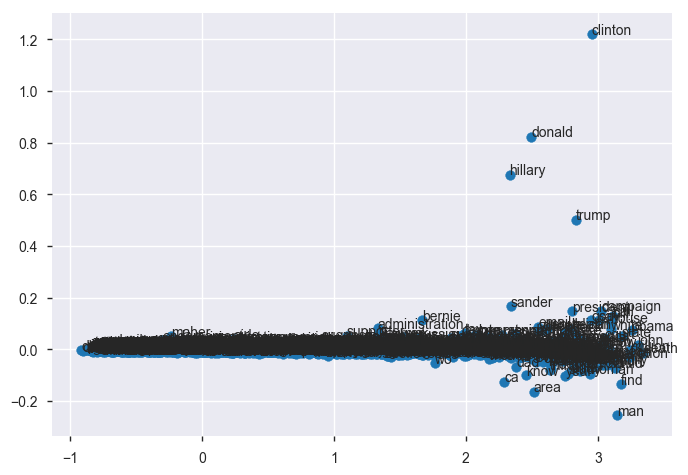

In [44]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.rcParams['figure.figsize'] = [10, 5]
pyplot.show()

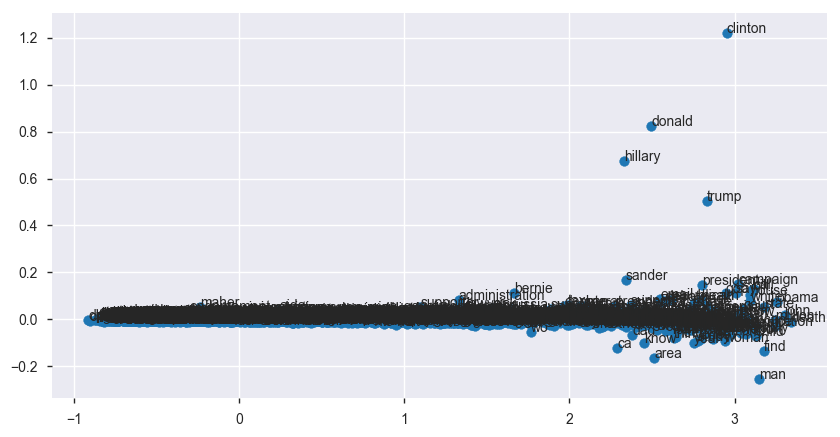

In [45]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.rcParams['figure.figsize'] = [50, 100]
pyplot.show()

In [46]:
redundant = ['is_sarcastic','article_link','headline_feature','sentence_feature','tokens','website_name']
features = list(set(raw_df2.columns) - set(redundant))
target_var = ['is_sarcastic']
#list(features)

In [47]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(raw_df2['website_name'])
# #LabelEncoder()
# list(le.classes_)

In [48]:
#raw_df2['website_name'] = le.transform(raw_df2['website_name']) 

In [49]:
raw_df2.head(3)

c0        c1        c2        c3        c4        c5        c6  \
0 -0.139985  0.003285 -0.543873  0.059772  0.292867  0.356666 -0.125814   
1 -0.121435  0.003876 -0.467312  0.051133  0.252841  0.310811 -0.108626   
2 -0.154318  0.004733 -0.592766  0.064784  0.321820  0.392463 -0.134153   

         c7        c8        c9       c10       c11       c12       c13  \
0  0.319368 -0.278367 -0.282394 -0.087757  0.054021  0.269981 -0.221005   
1  0.274376 -0.240441 -0.242197 -0.075161  0.045387  0.234291 -0.189200   
2  0.346636 -0.302167 -0.305615 -0.092104  0.056747  0.295147 -0.233196   

        c14       c15       c16       c17       c18       c19       c20  \
0 -0.242518 -0.049016 -0.082940  0.088703  0.028239  0.095270  0.289036   
1 -0.207283 -0.043683 -0.070952  0.079021  0.021207  0.082141  0.249519   
2 -0.258964 -0.051176 -0.091599  0.096980  0.029643  0.100039  0.311627   

        c21       c22       c23       c24       c25       c26       c27  \
0 -0.129619  0.063590  0.201192  0.090313 -0.023810  0.052403  0.274729   
1 -0.114157  0.057465  0.173983  0.074566 -0.021994  0.045757  0.234911   
2 -0.145393  0.072874  0.219355  0.095351 -0.025569  0.050350  0.299033   

        c28       c29       c30       c31       c32       c33       c34  \
0 -0.112848  0.096551 -0.024593 -0.224018  0.172920  0.032891 -0.008119   
1 -0.093326  0.085045 -0.022319 -0.195598  0.149366  0.029540 -0.009684   
2 -0.122878  0.110123 -0.028649 -0.247677  0.188533  0.036797 -0.011254   

        c35       c36       c37       c38       c39       c40       c41  \
0  0.041698 -0.276660 -0.215059 -0.073384  0.181855  0.035777 -0.240782   
1  0.036321 -0.238999 -0.183635 -0.061575  0.159503  0.033119 -0.208032   
2  0.044119 -0.302426 -0.234054 -0.076530  0.201916  0.044715 -0.261763   

        c42       c43       c44       c45       c46       c47       c48  \
0  0.185544  0.019772  0.137815  0.169118  0.120480 -0.027447 -0.097877   
1  0.155312  0.019439  0.120285  0.144291  0.107109 -0.024703 -0.081550   
2  0.202197  0.020401  0.148585  0.188736  0.126487 -0.032699 -0.105781   

        c49       c50       c51       c52       c53       c54       c55  \
0 -0.041875  0.183934 -0.234216  0.249597  0.067072  0.369512 -0.162229   
1 -0.035156  0.159222 -0.200077  0.214869  0.058943  0.320892 -0.141744   
2 -0.048871  0.198724 -0.256083  0.270298  0.072518  0.398971 -0.182651   

        c56       c57       c58       c59       c60       c61       c62  \
0 -0.161327  0.095138 -0.022989  0.201381  0.393674  0.102814  0.242178   
1 -0.138718  0.082540 -0.020621  0.173111  0.340265  0.091688  0.204686   
2 -0.172016  0.102923 -0.019995  0.220397  0.425029  0.109920  0.258563   

        c63       c64       c65       c66       c67       c68       c69  \
0  0.011951 -0.453970  0.238181 -0.021557 -0.174043  0.267868  0.171511   
1  0.011072 -0.392158  0.205197 -0.019759 -0.153368  0.229867  0.146917   
2  0.015674 -0.493111  0.259373 -0.029770 -0.194037  0.291463  0.185513   

        c70       c71       c72       c73       c74       c75       c76  \
0  0.140455 -0.318873  0.188780 -0.085434  0.026444  0.039247 -0.210383   
1  0.119113 -0.274375  0.164200 -0.075361  0.023681  0.034579 -0.183409   
2  0.147015 -0.347603  0.201577 -0.093881  0.029772  0.043461 -0.232017   

        c77       c78       c79       c80       c81       c82       c83  \
0  0.034056  0.065362  0.080748  0.060264  0.061604  0.031233  0.378404   
1  0.031008  0.058544  0.067882  0.050481  0.054798  0.026205  0.326132   
2  0.037911  0.072143  0.084666  0.069831  0.063765  0.037722  0.407785   

        c84       c85       c86       c87       c88       c89       c90  \
0  0.260155  0.598490  0.095684  0.218806 -0.288179  0.375664  0.080668   
1  0.224983  0.514223  0.082961  0.189058 -0.244721  0.322782  0.070409   
2  0.282462  0.640504  0.104213  0.234809 -0.312928  0.410968  0.086596   

        c91       c92       c93       c94       c95       c96       c97  \
0  0.261339  0.130927

In [50]:
from sklearn.model_selection import train_test_split, StratifiedKFold
train_data, test_data, train_target, test_target = train_test_split(raw_df2[features].as_matrix(), raw_df2[target_var], train_size = .8, random_state = 100)

In [51]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import linear_model

clf = linear_model.LogisticRegressionCV(cv = 5, random_state=0, solver='lbfgs',multi_class='ovr',penalty='l2').fit(train_data, train_target.values.ravel())
clf.score(train_data, train_target.values.ravel())

0.83675761688585204

In [52]:
from sklearn.metrics import accuracy_score
y_true = test_target.values.ravel()
y_pred = clf.predict(test_data)
accuracy_score(y_true, y_pred)

0.7836016473231

In [53]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp  = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2539, 467, 689, 1647)

In [54]:
weights = clf.coef_

In [59]:
feature_weights = weights[0]
feature_abs_weights = np.abs(weights[0])

In [60]:
feature_names = np.array(raw_df2[features].columns)

In [61]:
pd.set_option("display.max_rows", 200)

In [64]:
feature_importance = pd.DataFrame({'Features':feature_names, 'Weights':feature_weights, 'Weights Absolute':feature_abs_weights}).sort_values(by='Weights Absolute', ascending=False).reset_index(drop = True)
feature_importance.head(200)

Features   Weights  Weights Absolute
0    area           2.860869  2.860869        
1    nation         2.499772  2.499772        
2    introduces     2.109260  2.109260        
3    shit           2.069392  2.069392        
4    local          1.957934  1.957934        
5    self           1.894267  1.894267        
6    fucking        1.885271  1.885271        
7    report         1.877206  1.877206        
8    study          1.812988  1.812988        
9    clearly        1.657876  1.657876        
10   man            1.657209  1.657209        
11   announces      1.611359  1.611359        
12   fuck           1.581900  1.581900        
13   unveils        1.567973  1.567973        
14   donald        -1.547746  1.547746        
15   trans         -1.486248  1.486248        
16   hoping         1.484212  1.484212        
17   excited        1.483896  1.483896        
18   romney         1.463270  1.463270        
19   audience       1.447033  1.447033        
20   queer         -1.429879  1.429879        
21   allegedly     -1.429456  1.429456        
22   friend         1.375995  1.375995        
23   tweet         -1.374159  1.374159        
24   asshole        1.371938  1.371938        
25   given          1.371352  1.371352        
26   forced         1.364692  1.364692        
27   employee       1.356920  1.356920        
28   god            1.354319  1.354319        
29   struggling     1.353975  1.353975        
30   accused       -1.345605  1.345605        
31   entire         1.339739  1.339739        
32   jenner        -1.325587  1.325587        
33   bush           1.317772  1.317772        
34   hawaii        -1.317699  1.317699        
35   california    -1.310394  1.310394        
36   onion          1.303683  1.303683        
37   apartment      1.299944  1.299944        
38   near          -1.299424  1.299424        
39   lgbt          -1.297345  1.297345        
40   guy            1.285572  1.285572        
41   muslim        -1.283551  1.283551        
42   recommends     1.267655  1.267655        
43   unable         1.265921  1.265921        
44   transgender   -1.259230  1.259230        
45   realizes       1.257933  1.257933        
46   quickly        1.255384  1.255384        
47   spends         1.253275  1.253275        
48   protest       -1.246504  1.246504        
49   allows         1.232742  1.232742        
50   wondering      1.225789  1.225789        
51   instagram     -1.222912  1.222912        
52   kardashian    -1.214523  1.214523        
53   desperate      1.213584  1.213584        
54   york          -1.210794  1.210794        
55   scientist      1.204942  1.204942        
56   france        -1.195372  1.195372        
57   currently      1.187866  1.187866        
58   abuse         -1.186872  1.186872        
59   lgbtq         -1.180351  1.180351        
60   huffpost      -1.174722  1.174722        
61   trailer       -1.169242  1.169242        
62   snl           -1.156220  1.156220        
63   unaware        1.156176  1.156176        
64   announce       1.153770  1.153770        
65   uber          -1.144792  1.144792        
66   pretty         1.142007  1.142007        
67   hillary       -1.138562  1.138562        
68   coworker       1.132836  1.132836        
69   asks           1.129282  1.129282        
70   assures        1.115162  1.115162        
71   secretary      1.113787  1.113787        
72   archive        1.111963  1.111963        
73   rip           -1.107479  1.107479        
74   harvey        -1.106517  1.106517        
75   room           1.094145  1.094145        
76   dear          -1.091177  1.091177        
77   democrat      -1.075608  1.075608        
78   able           1.074175  1.074175        
79   panicked       1.069699  1.069699        
80   leadership    -1.068660  1.068660        
81   quietly        1.062162  1.062162        
82   adele         -1.061664  1.061664        
83   wife           1.061498  1.061498        
84   twitter   

In [65]:
raw_df[tokenDF_Final.self == 1][['article_link','headline_feature','is_sarcastic']].head(3).reset_index(drop=True)

article_link  \
0  https://local.theonion.com/just-take-it-slow-and-you-ll-be-fine-drunk-driver-a-1820399426    
1  https://www.theonion.com/bashar-al-assad-tries-tiny-bit-of-sarin-gas-on-self-to-1819575557   
2  https://www.theonion.com/narcissist-mentally-undresses-self-1819567215                       

                                                                                              headline_feature  \
0  'just take it slow, and you'll be fine,' drunk driver assures self while speeding away in stolen police car   
1  bashar al-assad tries tiny bit of sarin gas on self to see what it's like                                     
2  narcissist mentally undresses self                                                                            

   is_sarcastic  
0  1             
1  1             
2  1

In [66]:
import xgboost as xgb
clf1 = xgb.XGBClassifier(max_depth = 5, max_child_weight = 5, eta = 0.1, subsample = 1, colsample_bytree = 1, \
                          objective = 'reg:linear', num_boost_round=100, early_stopping_rounds=5).fit(train_data, train_target.values.ravel())
clf1.score(train_data, train_target.values.ravel())

0.72523049562409325

In [67]:
y_pred = clf1.predict(test_data)
accuracy_score(y_true, y_pred)

0.70067390490453019

In [68]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(max_depth = 10, criterion="entropy").fit(train_data, train_target.values.ravel())
clf2.score(train_data, train_target.values.ravel())

0.6533439415921749

In [69]:
y_pred = clf2.predict(test_data)
accuracy_score(y_true, y_pred)

0.64432796705353801

In [70]:
tn, fp, fn, tp  = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2921, 85, 1815, 521)

In [71]:
feature_importance[feature_importance.Features.isin(w2v_col_names)]

Features   Weights  Weights Absolute
700   c42      0.588654  0.588654        
1062  c94      0.471734  0.471734        
1152  c78      0.451407  0.451407        
1170  c85     -0.447847  0.447847        
1310  c61      0.412665  0.412665        
1369  c58      0.399083  0.399083        
1485  c82      0.372590  0.372590        
1488  c54     -0.372261  0.372261        
1737  c69     -0.317615  0.317615        
1817  c28      0.301897  0.301897        
1834  c49     -0.298799  0.298799        
1930  c3      -0.280644  0.280644        
1933  c75      0.280305  0.280305        
1957  c93      0.275948  0.275948        
1995  c47     -0.267750  0.267750        
2046  c76      0.257821  0.257821        
2071  c21     -0.251863  0.251863        
2095  c99      0.246666  0.246666        
2159  c62     -0.236300  0.236300        
2191  c44      0.230100  0.230100        
2193  c50     -0.229734  0.229734        
2202  c7       0.228947  0.228947        
2211  c71      0.226065  0.226065        
2247  c38      0.218376  0.218376        
2265  c43     -0.214565  0.214565        
2288  c57     -0.209827  0.209827        
2297  c60     -0.208056  0.208056        
2302  c41     -0.207538  0.207538        
2303  c45      0.207435  0.207435        
2319  c37     -0.203879  0.203879        
2332  c40      0.202623  0.202623        
2400  c39      0.191035  0.191035        
2448  c22     -0.182038  0.182038        
2476  c24      0.176304  0.176304        
2482  c26     -0.174715  0.174715        
2483  c25     -0.174633  0.174633        
2533  c86     -0.166995  0.166995        
2537  c81     -0.166700  0.166700        
2572  c6       0.159490  0.159490        
2607  c67      0.153024  0.153024        
2617  c83     -0.151666  0.151666        
2620  c89      0.150947  0.150947        
2640  c65     -0.146863  0.146863        
2645  c46      0.146134  0.146134        
2652  c90     -0.145081  0.145081        
2663  c31     -0.143774  0.143774        
2688  c9       0.140000  0.140000        
2712  c84      0.135959  0.135959        
2721  c12     -0.134884  0.134884        
2765  c98      0.127925  0.127925        
2775  c88      0.126445  0.126445        
2789  c1       0.123460  0.123460        
2836  c13     -0.114991  0.114991        
2871  c64      0.110512  0.110512        
2894  c33      0.105907  0.105907        
2898  c79     -0.105699  0.105699        
2913  c87     -0.102902  0.102902        
2916  c27     -0.102230  0.102230        
2923  c17     -0.100936  0.100936        
2924  c16      0.100928  0.100928        
2927  c5      -0.099337  0.099337        
2940  c14      0.096781  0.096781        
2961  c36     -0.093039  0.093039        
2967  c95      0.091923  0.091923        
2979  c59      0.090330  0.090330        
2991  c11      0.087174  0.087174        
3007  c19     -0.085200  0.085200        
3010  c70     -0.084903  0.084903        
3040  c80      0.078527  0.078527        
3046  c97      0.078038  0.078038        
3050  c72     -0.077729  0.077729        
3055  c29      0.076744  0.076744        
3061  c0      -0.075809  0.075809        
3099  c96     -0.070699  0.070699        
3122  c66      0.067195  0.067195        
3175  c32     -0.058893  0.058893        
3180  c48     -0.058320  0.058320        
3199  c74      0.055096  0.055096        
3228  c4       0.051443  0.051443        
3237  c51     -0.049181  0.049181        
3238  c34      0.049134  0.049134        
3273  c30     -0.042236  0.042236        
3290  c15     -0.039051  0.039051        
3311  c23      0.036684  0.036684        
3361  c92     -0.027065  0.027065        
3366  c10      0.026678  0.026678        
3374  c53     -0.025668  0.025668        
3383  c2      -0.024095  0.024095        
3396  c52     -0.022782  0.022782        
3400  c63      0.022383  0.022383        
3427  c68      0.017363  0.017363        
3432  c20     -0.016000  0.016000        
3438  c91     -0.015395  0.015395        
3460  c18     -0.012944  0.012944        
3466  c35      